### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptaran consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)


# Tarea 1: Análisis de señales usando la FFT

Para esta tarea considere la señal adjunta guardada en el archivo `elefante_ruidoso.dat`

Esta señal tiene valores complejos y fue muestreada a $100$ [Hz]

In [1]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import fftpack
with open('elefante_ruidoso.npy', 'rb') as f:
    x = np.load(f)

## Pregunta 1: Análisis preliminar (20%)

Responda
- ¿Cuántas muestras tiene la señal? ¿Cuál es la duración o largo temporal de la señal?  

- ¿Cuál es la mayor frecuencia que podemos estudiar usando transformada de Fourier en este caso? Fundamente su respuesta
 

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria de la señal en función de la parte real de la misma

Describa y clasifique la señal según los comportamientos que observa

In [2]:
display(x)
len(x)

array([  9.90414016-23.73106678j, -12.56436617-68.39189946j,
        29.4503895 -63.42328862j, ..., -34.93498822-78.34043014j,
         0.22519249-39.80127535j,  -5.45712674-33.3293338j ])

2000

La señal cuenta con 2000 valores, donde cada valor fue tomado en una fracción de tiempo única. Por esta razón, la duración contemplada por la señal es de 2000 unidades de tiempo.

In [3]:
import scipy.fft as sfft

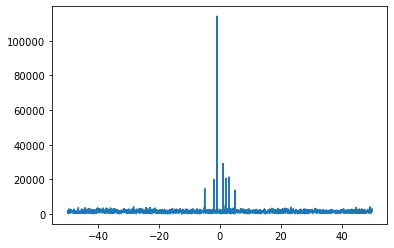

In [4]:
s = sfft.fft(x,len(x))
SA = np.absolute(s)
freqs = sfft.fftfreq(len(x), 1/100)
plt.figure()
plt.plot(sfft.fftshift(freqs), sfft.fftshift(SA))

A simple vista se puede apreciar que la señal presenta ruido, por lo que concluimos que es una señal no-periódica.  
Con una frecuencia de muestreo igual a 100, obtendremos la frecuencia máxima graficando las frecuencias de la transformada discreta de fourier por el espectro de amplitud del arreglo, de esta forma, tenemos que la frecuencia máxima es de -1 [Hz].   
Cabe mencionar que si cambia la frecuencia muestral, también lo hará la mayor frecuencia. 

In [5]:
def plotGraph(x):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,4))
    p_real = np.real(x)
    p_imag = np.imag(x)
    ax1.title.set_text('Parte real vs t')
    ax2.title.set_text('Parte imaginaria vs t')
    ax3.title.set_text('Nube de puntos')
    ax1.plot(p_real)
    ax2.plot(p_imag)
    ax3.scatter(p_real,p_imag, s=1)
    


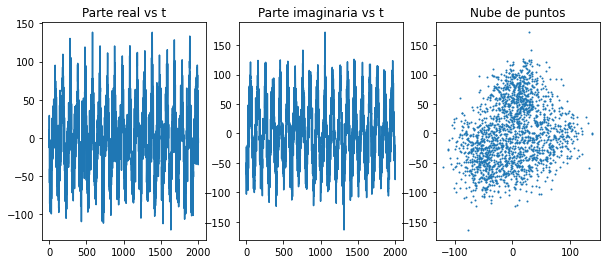

In [6]:
plotGraph(x)

Ambas gráficas 

In [7]:
#fig, ax3=plt.subplots()
#ax3.title.set_text('nube de puntos: parte real vs parte imaginaria')
#ax3.scatter(p_real,p_imag)

asdasd

## Pregunta 2: Análisis de Fourier (40%)

- Escriba una función que reciba la señal y retorne el espectro de amplitud, el espectro de fase y las frecuencias asociadas a la señal. 
- Muestre dos gráficos con el espectro de amplitud y espectro de fase en función de la frecuencia, respectivamente. Comente sobre lo que observa
- Escriba una función que reciba un número entero $M$ y que retorne un espectro de magnitud modificado donde los $M$ componentes mayores se mantienen y todos los demás se hacen igual a cero, retorne también el índice de los $M$ componentes mayores
- Muestre graficamente el espectro de magnitud modificado con $M=7$. Imprima los valores de las **frecuencias, amplitudes y fases** de los $M$ componentes ordenados en orden descedente según su amplitud


Función que recibe la señal s y retorna el espectro de amplitud, espectro de fase y frecuencias asociadas

In [8]:
import scipy.fft as sfft

def F(s):
    Fs = 40
    S = sfft.fft(s,len(s))
    SA = np.absolute(s)
    SP = np.angle(s)
    freqs = sfft.fftfreq(len(x),1/Fs)
    return SA, SP, freqs



In [9]:
SA, SP, freqs = F(x)

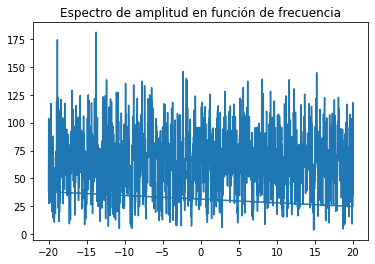

In [10]:
plt.figure()
plt.title("Espectro de amplitud en función de frecuencia")
plt.plot(freqs,SA)

En primera instancia, se puede apreciar que el gráfico presenta las amplitudes que alcanza la señal entre los rangos de frecuencias que van desde los [-20, 20] Hz. También se puede apreciar un valor que sobresale del resto, esta es su amplitud más alta, alcanzando las 181 unidades de amplitud cuando su frecuencia es de -13,76 Hz

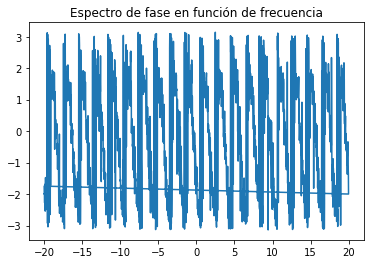

In [11]:
plt.figure()
plt.title("Espectro de fase en función de frecuencia")
plt.plot(freqs,SP)

El gráfico presenta el ángulo que toma cada una de las componentes frecuenciales entre un rango de [- $\pi$ , $\pi$]. Claramente puede visualizarse cierta periodicidad en el transcurso de 2 Hz. 

In [12]:
def modifiedSpectrum(SA,M):
    MS = SA.copy()
    j = np.argsort(MS)
    ind = np.argsort(MS)[-M:]
    for i in j:
        if i not in ind:
            MS[i] = 0
    ind = np.flip(ind)
    return MS, ind


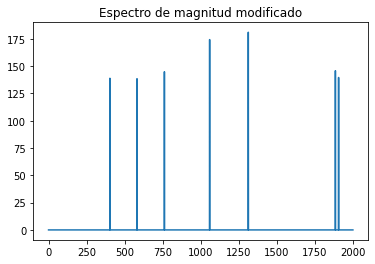

In [13]:
# Espectro modificado para M = 7
ms, ind = modifiedSpectrum(SA,7)

plt.figure()
plt.title("Espectro de magnitud modificado")
plt.plot(ms)



In [14]:
# Indices ordenados descendentemente en función de su amplitud
print("indices", ind, "\n")

# Frecuencias asociadas a los M valores
print("Frecuencias ",freqs[ind],"\n")

# Amplitudes asociadas a los M valores
print("Amplitudes ",SA[ind],"\n")

# Fases asociadas a los M valores
print("Fases ",SP[ind],"\n")


indices [1312 1058 1884  761 1905  403  581] 

Frecuencias  [-13.76 -18.84  -2.32  15.22  -1.9    8.06  11.62] 

Amplitudes  [181.09867207 174.36834766 145.83522028 144.89461767 139.65220877
 138.93196252 138.49480955] 

Fases  [-2.00954238  1.40252679 -0.41543217  1.35169751 -2.34912272 -2.04269113
 -0.01192803] 



## Pregunta 3: Reconstrucción (40%)

Use la transformada de Fourier inversa para reconstruir la señal en base al espectro de amplitud modificado y el espectro de fase. 

Para $M=[100, 10, 7, 5, 3, 1]$ (puede usar otros valores si lo considera necesario en su análisis) muestre

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal reconstruida en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria en función de la parte real de la señal reconstruida


Describa y comente lo que observa, en particular compare cada resultado con el caso `M=len(x)` (caso original) y discuta sobre lo que ocurre para $M>7$, $M=7$ y $M<7$ con respecto al ruido y la información relevante de la señal ¿Pueden ver al elefante en el ruido? 

In [15]:
def reConst(ind, SM, SP):
    C_array = []
    for i in range (0,len(ind)):
        C_array.append(SA[ind]*np.exp(1j*SP[ind]))
    #print(C_array)
    res = scipy.fft.ifft(C_array)
    return res

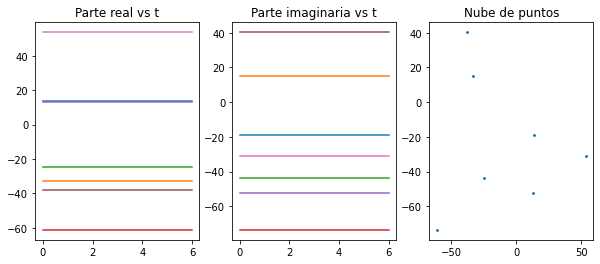

In [16]:
res = reConst(ind,ms, SP)
plotGraph(res)

In [ ]:
M = [2000,100, 10, 7, 5, 3, 1]
for j in M:
    magn, indices = modifiedSpectrum(SA,j)
    clean = reConst(indices, magn, SP)
    plotGraph(clean)
    

## Indicaciones

- Puede usar las funciones `np.real` e `np.imag` para obtener la parte real e imaginaria de un número complejo, respectivamente
- Si `x` y `y` son la parte real e imaginaria de un número complejo, puedes reconstruir el número complejo con `c = x + 1j*y`
- Si `rho` y `phi` son la amplitud y ángulo de un número complejo, puedes reconstruir el número complejo usando `c = rho*np.exp(1j*phi)`
- Recuerden que un slice de un `ndarray` no es una copia sino una referencia. Para crear copias use el atributo `.copy()`
- Usa `scipy.fft.fft` y `scipy.fft.ifft` para calcular la FFT directa e inversa, respectivamente

## Éxito!

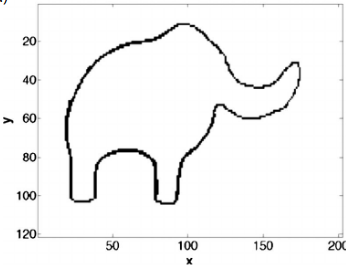